# Наумов П. 3413

Тема. Применение условных вероятностей в анализе данных

На некотором наборе данных (выбрать самостоятельно, можно: https://www.kaggle.com/datasets) продемонстрировать применение условных вероятностей (см. пример с рейтингом автомобилей по типу кузова, Notebook с примером "Титаника"). Рассматриваемый набор данных необходимо описать (назначение, описание признаков).
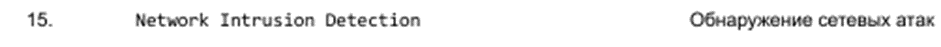

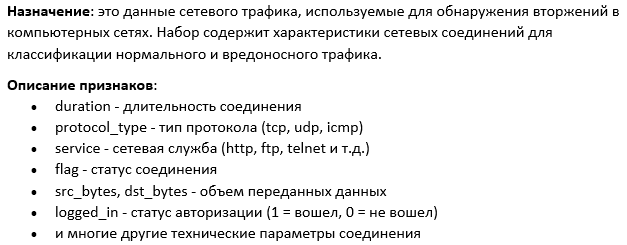

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Test_data.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


## Условная вероятность

In [3]:
# Функция для вычисления условных вероятностей (как в примере с Титаником)
def conditional_probability(df, condition_col, condition_val, target_col, target_val=1):
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

# Для демонстрации выберем несколько ключевых признаков
print("АНАЛИЗ УСЛОВНЫХ ВЕРОЯТНОСТЕЙ ДЛЯ СЕТЕВОГО ТРАФИКА")
print("=" * 60)

# По типу протокола
print("\nВероятность по типу протокола:")
for protocol in df['protocol_type'].unique():
    prob = conditional_probability(df, 'protocol_type', protocol, 'logged_in')
    print(f" P(logged_in|protocol_type={protocol}) = {prob:.3f}")

# По сервису (топ-5 самых частых)
print("\nВероятность по сервису (топ-5):")
top_services = df['service'].value_counts().head(5).index
for service in top_services:
    prob = conditional_probability(df, 'service', service, 'logged_in')
    print(f" P(logged_in|service={service}) = {prob:.3f}")

# По флагу соединения
print("\nВероятность по флагу соединения:")
top_flags = df['flag'].value_counts().head(5).index
for flag in top_flags:
    prob = conditional_probability(df, 'flag', flag, 'logged_in')
    print(f" P(logged_in|flag={flag}) = {prob:.3f}")

АНАЛИЗ УСЛОВНЫХ ВЕРОЯТНОСТЕЙ ДЛЯ СЕТЕВОГО ТРАФИКА

Вероятность по типу протокола:
 P(logged_in|protocol_type=tcp) = 0.528
 P(logged_in|protocol_type=icmp) = 0.000
 P(logged_in|protocol_type=udp) = 0.000

Вероятность по сервису (топ-5):
 P(logged_in|service=http) = 0.955
 P(logged_in|service=private) = 0.000
 P(logged_in|service=telnet) = 0.065
 P(logged_in|service=pop_3) = 0.872
 P(logged_in|service=smtp) = 0.970

Вероятность по флагу соединения:
 P(logged_in|flag=SF) = 0.624
 P(logged_in|flag=REJ) = 0.000
 P(logged_in|flag=S0) = 0.000
 P(logged_in|flag=RSTO) = 0.172
 P(logged_in|flag=RSTR) = 0.798
